# CAPM and Fama French 3 Factor Model

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dfData = pd.read_csv("ps_data.csv", index_col=0)
dfData.head()

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM,Mkt-RF,SMB,HML,RF
196307,1.7088,-0.1652,0.4610,-0.0034,-1.2185,-2.3585,0.1899,-0.9537,-1.9585,-1.2468,...,-1.8567,0.1547,0.4353,1.2557,-0.4290,-1.1026,-0.39,-0.53,-0.89,0.27
196308,4.7861,1.5129,1.3307,2.2503,4.8024,5.1861,4.5191,4.5271,4.7649,7.8614,...,5.3469,5.7691,4.2211,4.7487,8.1419,6.3824,5.07,-0.89,1.68,0.25
196309,-2.9962,0.6402,-0.8841,-1.5254,-0.4453,-4.0186,-1.5034,-0.9515,-1.3504,-2.8348,...,-1.9943,-1.3595,-0.7485,-0.9852,-0.1905,-3.4963,-1.57,-0.35,0.08,0.27
196310,1.0074,-0.6004,1.1238,0.1927,2.4197,1.4128,4.2342,2.4178,2.0955,3.8633,...,0.6113,5.3339,1.7428,-0.2829,2.4150,0.4857,2.53,-0.56,-0.14,0.29
196311,-3.5978,-4.0645,-1.6048,-1.0272,-1.1198,-4.1169,-1.7534,-0.7796,-0.1543,-0.1210,...,3.5388,-1.2556,0.9968,-1.5542,-2.1322,1.3455,-0.85,-1.17,1.81,0.27


In [3]:
dfPortfolios = dfData.drop(["Mkt-RF", "SMB", "HML", "RF"], axis=1)
dfPortfolios.head()

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
196307,1.7088,-0.1652,0.4610,-0.0034,-1.2185,-2.3585,0.1899,-0.9537,-1.9585,-1.2468,...,-0.9806,-1.4514,-1.9184,-1.5895,-1.8567,0.1547,0.4353,1.2557,-0.4290,-1.1026
196308,4.7861,1.5129,1.3307,2.2503,4.8024,5.1861,4.5191,4.5271,4.7649,7.8614,...,5.4259,4.6910,6.2332,7.7388,5.3469,5.7691,4.2211,4.7487,8.1419,6.3824
196309,-2.9962,0.6402,-0.8841,-1.5254,-0.4453,-4.0186,-1.5034,-0.9515,-1.3504,-2.8348,...,-2.7974,-2.1585,-1.7800,-4.0665,-1.9943,-1.3595,-0.7485,-0.9852,-0.1905,-3.4963
196310,1.0074,-0.6004,1.1238,0.1927,2.4197,1.4128,4.2342,2.4178,2.0955,3.8633,...,-0.3902,0.6873,2.6229,4.7988,0.6113,5.3339,1.7428,-0.2829,2.4150,0.4857
196311,-3.5978,-4.0645,-1.6048,-1.0272,-1.1198,-4.1169,-1.7534,-0.7796,-0.1543,-0.1210,...,-0.8798,-0.6788,-0.7933,1.6199,3.5388,-1.2556,0.9968,-1.5542,-2.1322,1.3455


In [4]:
dfPortfoliosExcess = dfPortfolios
for col in dfPortfoliosExcess.columns:
    dfPortfoliosExcess[col] = dfPortfoliosExcess[col] - dfData["RF"]

dfPortfoliosExcess.head()

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
196307,1.4388,-0.4352,0.1910,-0.2734,-1.4885,-2.6285,-0.0801,-1.2237,-2.2285,-1.5168,...,-1.2506,-1.7214,-2.1884,-1.8595,-2.1267,-0.1153,0.1653,0.9857,-0.6990,-1.3726
196308,4.5361,1.2629,1.0807,2.0003,4.5524,4.9361,4.2691,4.2771,4.5149,7.6114,...,5.1759,4.4410,5.9832,7.4888,5.0969,5.5191,3.9711,4.4987,7.8919,6.1324
196309,-3.2662,0.3702,-1.1541,-1.7954,-0.7153,-4.2886,-1.7734,-1.2215,-1.6204,-3.1048,...,-3.0674,-2.4285,-2.0500,-4.3365,-2.2643,-1.6295,-1.0185,-1.2552,-0.4605,-3.7663
196310,0.7174,-0.8904,0.8338,-0.0973,2.1297,1.1228,3.9442,2.1278,1.8055,3.5733,...,-0.6802,0.3973,2.3329,4.5088,0.3213,5.0439,1.4528,-0.5729,2.1250,0.1957
196311,-3.8678,-4.3345,-1.8748,-1.2972,-1.3898,-4.3869,-2.0234,-1.0496,-0.4243,-0.3910,...,-1.1498,-0.9488,-1.0633,1.3499,3.2688,-1.5256,0.7268,-1.8242,-2.4022,1.0755


In [5]:
dfMeanExcess = dfPortfoliosExcess.mean()
dfMeanExcess

SMALL LoBM    0.371975
ME1 BM2       0.857233
ME1 BM3       0.818727
ME1 BM4       1.011727
SMALL HiBM    1.146233
ME2 BM1       0.584383
ME2 BM2       0.828658
ME2 BM3       0.882378
ME2 BM4       0.910697
ME2 BM5       1.034405
ME3 BM1       0.594957
ME3 BM2       0.827448
ME3 BM3       0.769837
ME3 BM4       0.893777
ME3 BM5       1.014854
ME4 BM1       0.697365
ME4 BM2       0.678124
ME4 BM3       0.732615
ME4 BM4       0.856368
ME4 BM5       0.886953
BIG LoBM      0.599203
ME5 BM2       0.579927
ME5 BM3       0.590480
ME5 BM4       0.528318
BIG HiBM      0.687249
dtype: float64

## CAPM

In [6]:
dfReg = pd.DataFrame(columns=["beta", "alpha", "r_squared"])
dfReg.head()

,beta,alpha,r_squared


In [7]:
for col in dfPortfoliosExcess:
    model = LinearRegression()
    x = dfData["Mkt-RF"].values
    x = x.reshape(len(x),1)
    y = dfPortfoliosExcess[col].values
    y = y.reshape(len(y),-1)
    model.fit(x, y)
    beta = model.coef_[0][0]
    alpha = model.intercept_[0]
    r_squared = model.score(x,y)
    
    dfReg.loc[col] = [beta, alpha, r_squared]
dfReg.head(25)

,beta,alpha,r_squared
SMALL LoBM,1.421979,-0.465144,0.631492
ME1 BM2,1.233408,0.131126,0.619714
ME1 BM3,1.115696,0.161917,0.673919
ME1 BM4,1.043896,0.397185,0.633158
SMALL HiBM,1.080302,0.510259,0.582963
ME2 BM1,1.388013,-0.232741,0.743166
ME2 BM2,1.180927,0.133447,0.757666
ME2 BM3,1.074310,0.249932,0.750772
ME2 BM4,1.022941,0.308491,0.723899
ME2 BM5,1.155173,0.354355,0.684001


### SMALLLoBM PRrediction

In [8]:
RMRF = dfData["Mkt-RF"].mean()

prediction = dfReg.loc["SMALL LoBM", "beta"]*RMRF
alpha = dfReg.loc["SMALL LoBM", "alpha"]
averageReturn = dfMeanExcess.loc["SMALL LoBM"]

In [9]:
print(averageReturn - prediction == alpha)


True


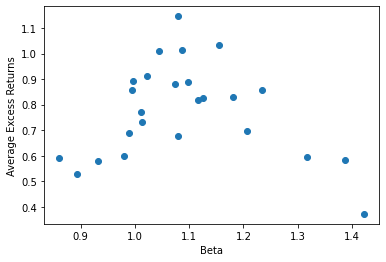

In [10]:
dfReg["returns"] = dfMeanExcess
plt.scatter(dfReg["beta"], dfReg["returns"])
plt.xlabel("Beta")
plt.ylabel("Average Excess Returns")
plt.show()

### Error

In [11]:
# Mean Absolute Errors
MAE = dfReg["alpha"].abs().sum() / dfReg.shape[0]
MAE


0.2037496589482201

In [12]:
# Root Mean Squared Erros
RMSE = np.sqrt(np.power(dfReg["alpha"], 2).sum() / dfReg.shape[0])
RMSE

0.2473311137390207

## FF3F

In [13]:
dfRegFF3F = pd.DataFrame(columns=["beta","s", "h", "alpha", "r_squared"])


In [14]:
for col in dfPortfoliosExcess:
    model = LinearRegression()
    
    mkt = dfData[["Mkt-RF", "SMB", "HML"]]
 
    y = dfPortfoliosExcess[col].values
    y = y.reshape(len(y), -1)
    model.fit(mkt, y)
    beta = model.coef_[0][0]
    s = model.coef_[0][1]
    h = model.coef_[0][2]
    alpha = model.intercept_[0]
    r_squared = model.score(mkt, y)
    
    dfRegFF3F.loc[col] = [beta, s, h, alpha, r_squared]

dfRegFF3F.head(25)
    

,beta,s,h,alpha,r_squared
SMALL LoBM,1.102926,1.388432,-0.274433,-0.485311,0.909601
ME1 BM2,0.967315,1.326557,0.018480,0.013246,0.926060
ME1 BM3,0.938064,1.086620,0.307344,-0.037302,0.952528
ME1 BM4,0.891853,1.078164,0.480331,0.137901,0.950240
SMALL HiBM,0.952487,1.104076,0.693877,0.173775,0.907484
ME2 BM1,1.134090,1.012657,-0.353900,-0.193435,0.944572
ME2 BM2,1.014580,0.904286,0.121589,0.014799,0.945988
ME2 BM3,0.979321,0.740425,0.398156,0.047878,0.928399
ME2 BM4,0.953012,0.731001,0.565885,0.048300,0.946787
ME2 BM5,1.083733,0.884925,0.780775,0.005742,0.951357


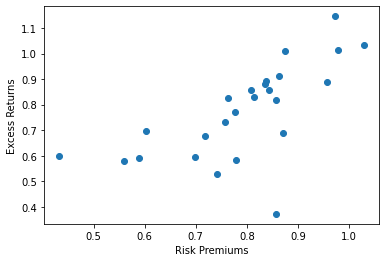

In [16]:
RMRF = dfData["Mkt-RF"].mean()
SMB = dfData["SMB"].mean()
HML = dfData["HML"].mean()
prediction = dfRegFF3F["beta"]*RMRF + dfRegFF3F["s"]*SMB + dfRegFF3F["h"]*HML
plt.scatter(prediction, dfMeanExcess)
plt.xlabel("Risk Premiums")
plt.ylabel("Excess Returns")
plt.show()

### Errors

In [88]:
# Mean Absolute Errors
MAE = dfRegFF3F["alpha"].abs().sum() / dfRegFF3F.shape[0]
MAE

0.09163335823631602

In [89]:
# Root Mean Squared Errors
RMSE = np.sqrt(np.power(dfRegFF3F["alpha"], 2).sum() / dfRegFF3F.shape[0])
RMSE

0.13767994039998896